In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install tensorflow

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [4]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wille\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
!pip install lime


In [6]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer, IndexedString, IndexedCharacters, explanation
from lime.lime_base import LimeBase

sns.set(font_scale=1.3)
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wille\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df_train = pd.read_csv('C:/Users/wille/Downloads/emotions-dataset-for-nlp/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('C:/Users/wille/Downloads/emotions-dataset-for-nlp/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('C:/Users/wille/Downloads/emotions-dataset-for-nlp/test.txt', names=['Text', 'Emotion'], sep=';')

In [8]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
df_train['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [10]:
print(df_test.shape)
df_test.head()

(2000, 2)


,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [11]:
print(df_val.shape)
df_val.head()

(2000, 2)


,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [12]:
df_train['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [13]:
df_train['Emotion'].value_counts() / df_train.shape[0] * 100

Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

<Axes: xlabel='Emotion', ylabel='count'>

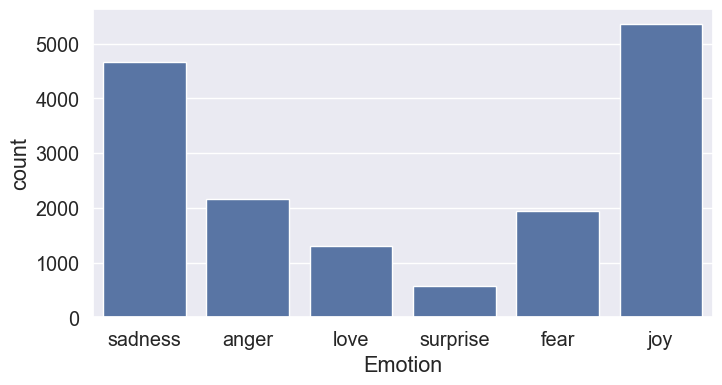

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Emotion', data=df_train)

In [15]:
df_train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [16]:
df_train.duplicated().sum()

1

In [17]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [18]:
df_train[df_train.duplicated() == True].index

Index([], dtype='int64')

In [19]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [20]:
df_train[df_train['Text'] == df_train.iloc[7623]['Text']]

,Text,Emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [21]:
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis=0, inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [22]:
df_train[df_train['Text'].duplicated() == True]

,Text,Emotion


In [23]:
temp = df_train.copy()
stop_words = set(stopwords.words('english'))
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

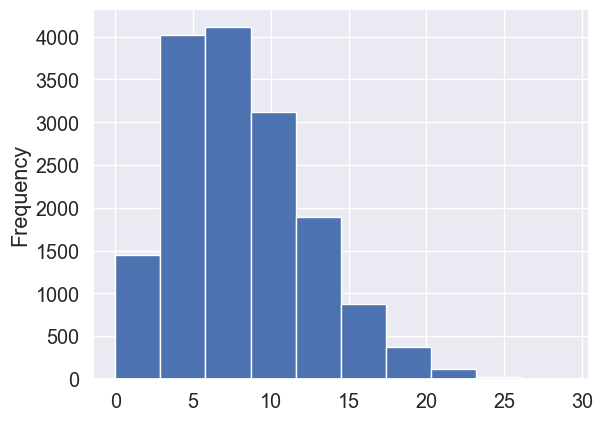

In [24]:
temp['stop_words'].plot(kind='hist')

In [25]:
df_test['Emotion'].value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

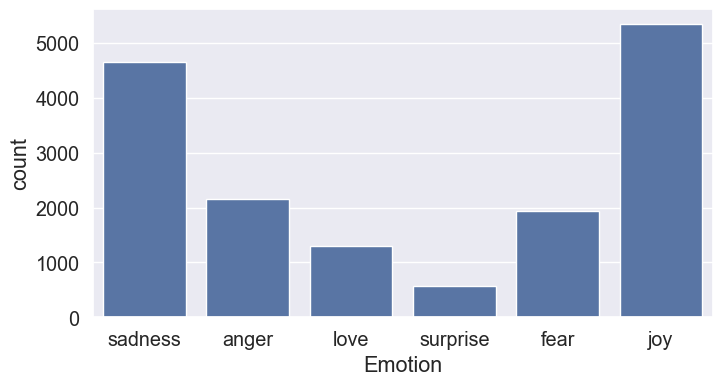

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Emotion')

In [27]:
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [28]:
df_test.duplicated().sum()

0

In [29]:
df_test[df_test['Text'].duplicated() == True].index

Index([], dtype='int64')

In [30]:
temp = df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(x.split()) & set(stop_words)))
temp['stop_words'].value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

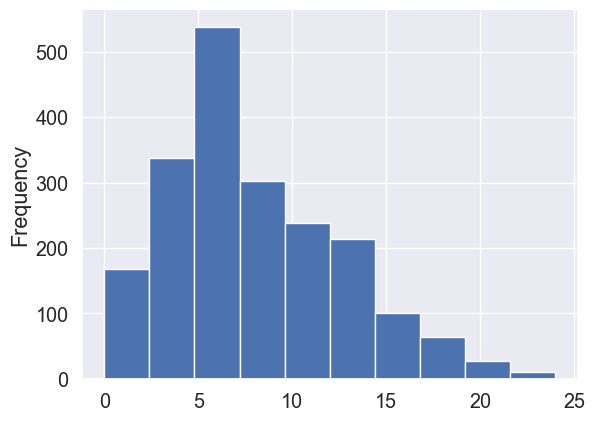

In [31]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [32]:
!python --version

Python 3.12.4


In [33]:
df_val['Emotion'].value_counts()

Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

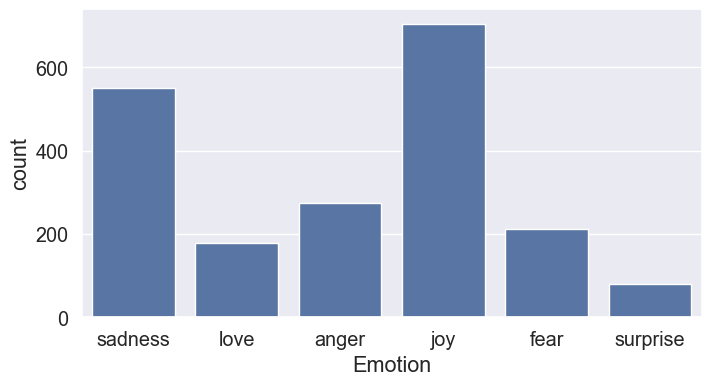

In [34]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_val, x='Emotion')

In [35]:
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [36]:
df_val.duplicated().sum()

0

In [37]:
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [38]:
df_val[df_val['Text'] == df_val.iloc[603]['Text']] 

,Text,Emotion
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [39]:
df_val[df_val['Text'] == df_val.iloc[1993]['Text']] 

,Text,Emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [40]:
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis=0, inplace=True)
df_val.reset_index(inplace=True, drop=True)

In [41]:
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion


In [42]:
temp = df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x : len(set(stop_words) & set(x.split())))
temp['stop_words'].value_counts()

stop_words
7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
12     76
13     74
1      64
14     63
15     44
16     36
17     31
18     21
19     16
20     16
0      11
21      6
22      3
23      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

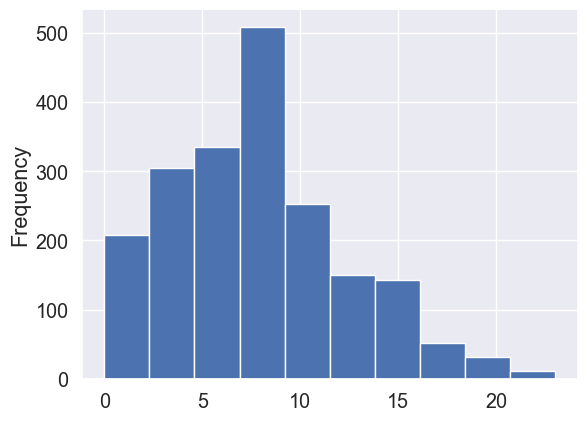

In [43]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind='hist')

In [44]:
def dataframe_difference(df1, df2, which=None):
    comparision_df = df1.merge(
        df2, 
        indicator=True,
        how='outer'
    )
    
    if which is None:
        diff_df = comparision_df[comparision_df['_merge'] != 'both']
    else:
        diff_df = comparision_df[comparision_df['_merge'] == which]
        
    return diff_df

In [45]:
dataframe_difference(df_train, df_test, 'both')

,Text,Emotion,_merge


In [46]:
dataframe_difference(df_train, df_val, which='both')

,Text,Emotion,_merge


In [47]:
dataframe_difference(df_val, df_test, which='both')

,Text,Emotion,_merge


In [48]:
import re
from nltk.stem import WordNetLemmatizer
import numpy as np

lemmatizer = WordNetLemmatizer()
stop_words = set(["the", "is", "and", "in", "to", "with"])  # Add custom stop words here

def lemmatization(text):
    text = text.split()
    text = [lemmatizer.lemmatize(y) for y in text]
    return " ".join(text)

def remove_stop_words(text):
    Text = [i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text = [y.lower() for y in text]
    return " ".join(text)

def Removing_punctuations(text):
    # Define punctuations as a raw string
    punctuations = r"""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""
    
    # Use re.sub to remove these punctuations
    text = re.sub(r'[{}]+'.format(re.escape(punctuations)), ' ', text)
    
    # Explicitly remove the Arabic semicolon
    text = text.replace('؛', "")
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()


def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text = df.Text.apply(lambda text: lower_case(text))
    df.Text = df.Text.apply(lambda text: remove_stop_words(text))
    df.Text = df.Text.apply(lambda text: Removing_numbers(text))
    df.Text = df.Text.apply(lambda text: Removing_punctuations(text))
    df.Text = df.Text.apply(lambda text: Removing_urls(text))
    df.Text = df.Text.apply(lambda text: lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence = lower_case(sentence)
    sentence = remove_stop_words(sentence)
    sentence = Removing_numbers(sentence)
    sentence = Removing_punctuations(sentence)
    sentence = Removing_urls(sentence)
    sentence = lemmatization(sentence)
    return sentence


In [49]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wille\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_")

'my name mohamed tweet play egypt'

In [51]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)


In [52]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless so damned ho...,sadness
2,im grabbing a minute post i feel greedy wrong,anger
3,i am ever feeling nostalgic about fireplace i ...,love
4,i am feeling grouchy,anger


In [53]:
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']

In [54]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [55]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [56]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [57]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [58]:
tokenizer.word_counts

OrderedDict([('i', 29009),
             ('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('can', 1086),
             ('go', 492),
             ('from', 786),
             ('feeling', 6139),
             ('so', 2837),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('just', 1608),
             ('being', 761),
             ('around', 347),
             ('someone', 295),
             ('who', 668),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('a', 8710),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('am', 2331),
             ('ever', 247),
             ('nostalgic', 55),
             ('about', 2015),
             ('fireplace', 3),
             ('will', 793),
             ('know', 977),
             ('that', 5718),
             ('it',

In [59]:
tokenizer.document_count

17969

In [60]:
tokenizer.word_index['go']

89

In [61]:
tokenizer.texts_to_sequences(X_train[0].split())

[[2], [133], [3], [636]]

In [62]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(4, 14448)

In [63]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [64]:
len(sequences_train)

15969

In [65]:
max_len = max([len(text) for text in df_train['Text']])
max_len

281

In [66]:
X_train = pad_sequences(sequences_train, maxlen=max_len, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=max_len, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=max_len, truncating='pre')

In [67]:
vocabSize = len(tokenizer.index_word) + 1
print(f"The vocab size is {vocabSize}")

The vocab size is 14448


In [68]:
path_to_glove_file = 'C:/Users/wille/Downloads/glove-global-vectors-for-word-representation/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0
embedding_index = {}

In [69]:
with open(path_to_glove_file, encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embedding_index[word] = coefs

print(f"Found {len(embedding_index)} word vectors")

embedding_matrix = np.zeros((num_tokens, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f"Converted {hits} word vectors, missed {misses} words")


Found 400000 word vectors
Converted 13365 word vectors, missed 1082 words


In [70]:
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.build(
    input_shape=(None, X_train.shape[1])
)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

C:\Users\wille\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 281, 200)            │       2,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 281, 512)            │         935,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 281, 256)            │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,877,702 (18.61 MB)

 Trainable params: 1,988,102 (7.58 MB)

 Non-trainable params: 2,889,600 (11.02 MB)

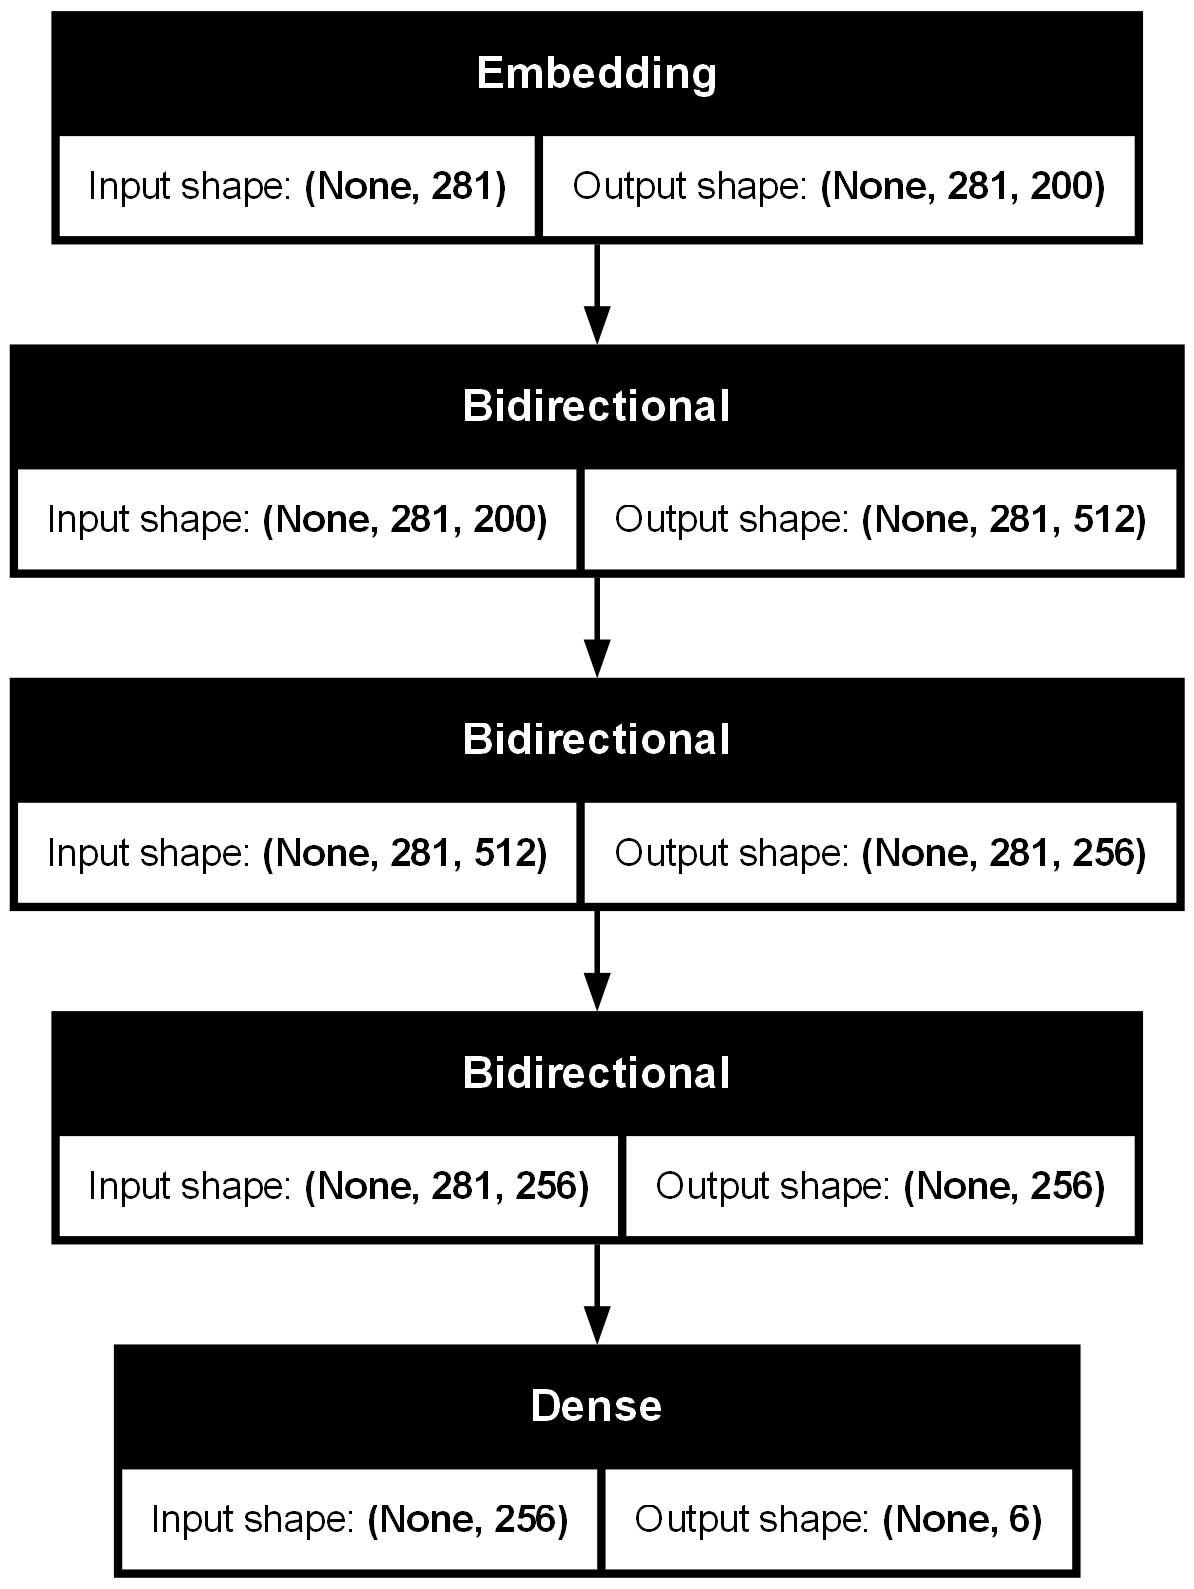

In [71]:
!pip install pydot
!pip install graphviz

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [72]:
callback = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust feature size for dataset
X_train_rf = tfidf.fit_transform(df_train['Text']).toarray()
X_test_rf = tfidf.transform(df_test['Text']).toarray()

# Step 2: Labels (already integer-encoded in your dataset)
y_train_rf = df_train['Emotion'].values
y_test_rf = df_test['Emotion'].values

# Step 3: Define Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_model = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_rf, y_train_rf)

# Step 4: Evaluate the model
rf_predictions = rf_model.predict(X_test_rf)

# Classification Report
print("Random Forest Results:")
print(classification_report(y_test_rf, rf_predictions))


# Accuracy
accuracy_rf = accuracy_score(y_test_rf, rf_predictions)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Random Forest Results:
              precision    recall  f1-score   support

       anger       0.87      0.83      0.85       275
        fear       0.89      0.76      0.82       224
         joy       0.83      0.83      0.83       695
        love       0.65      0.88      0.75       159
     sadness       0.88      0.79      0.83       581
    surprise       0.54      0.94      0.69        66

    accuracy                           0.82      2000
   macro avg       0.78      0.84      0.79      2000
weighted avg       0.83      0.82      0.82      2000

Random Forest Accuracy: 0.8180


NameError: name 'conf_matrix_rf' is not defined

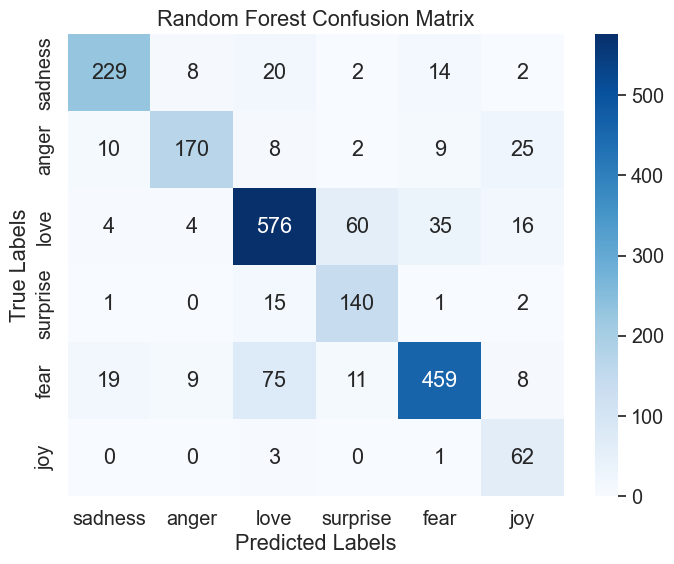

In [74]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_rf, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Decision Tree Classification Report:
              precision    recall  f1-score   support

       anger       0.86      0.86      0.86       275
        fear       0.81      0.85      0.83       224
         joy       0.86      0.84      0.85       695
        love       0.69      0.75      0.72       159
     sadness       0.89      0.83      0.86       581
    surprise       0.59      0.82      0.69        66

    accuracy                           0.83      2000
   macro avg       0.78      0.83      0.80      2000
weighted avg       0.84      0.83      0.84      2000

Decision Tree Accuracy: 0.8340


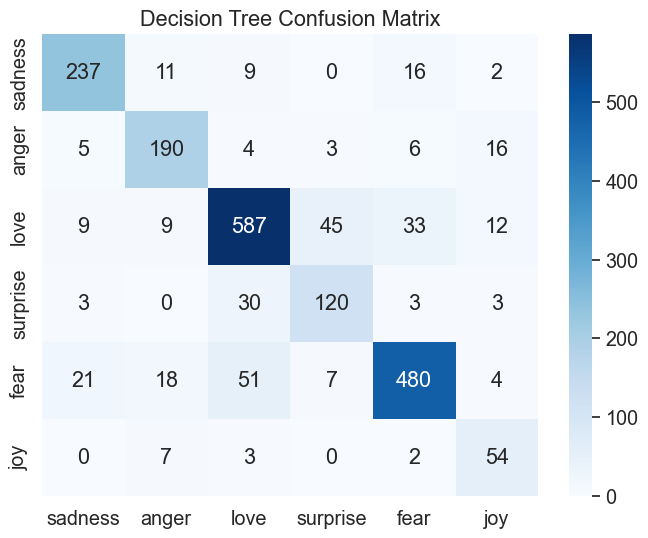

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_rf, y_train_rf)

# Step 2: Predict and evaluate the model
dt_predictions = dt_model.predict(X_test_rf)

# Step 3: Print classification report and accuracy
print("Decision Tree Classification Report:")
print(classification_report(y_test_rf, dt_predictions))

# Accuracy
dt_accuracy = accuracy_score(y_test_rf, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test_rf, dt_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [77]:
#Training LSTM model
history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_val, y_val),
    verbose=True,
    batch_size=256,
    epochs=5,
    callbacks=[callback]
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 537s 8s/step - accuracy: 0.3651 - loss: 1.5761 - val_accuracy: 0.5380 - val_loss: 1.2486
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 533s 8s/step - accuracy: 0.5514 - loss: 1.1870 - val_accuracy: 0.6456 - val_loss: 0.9015
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 625s 10s/step - accuracy: 0.7249 - loss: 0.7511 - val_accuracy: 0.8844 - val_loss: 0.3404
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 595s 9s/step - accuracy: 0.8812 - loss: 0.3402 - val_accuracy: 0.9154 - val_loss: 0.2166
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 666s 11s/step - accuracy: 0.9142 - loss: 0.2137 - val_accuracy: 0.9179 - val_loss: 0.1738


In [78]:
model.evaluate(X_val, y_val, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.9170 - loss: 0.1643


[0.17383378744125366, 0.9179179072380066]

In [79]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       275
           1       0.85      0.94      0.89       224
           2       0.96      0.90      0.93       695
           3       0.77      0.87      0.81       159
           4       0.96      0.97      0.96       581
           5       0.81      0.71      0.76        66

    accuracy                           0.92      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.92      0.92      0.92      2000



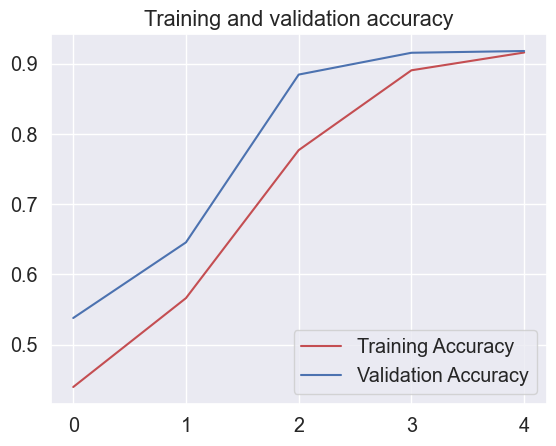

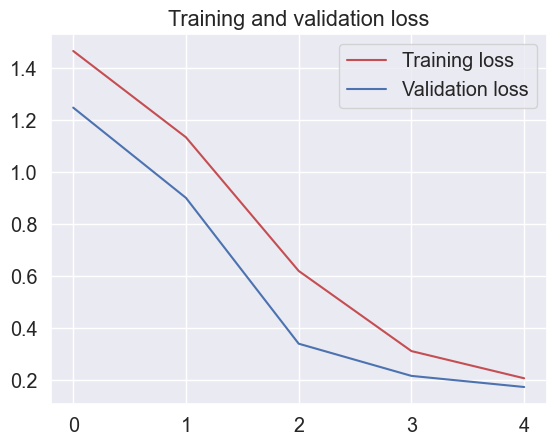

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
sentences = [
            "He's over the moon about being accepted to the university",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]

for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba = np.max(model.predict(sentence))
    
    print(f"{result} : {proba}")
    

He's over the moon about being accepted to the university
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
joy : 0.7152152061462402
Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
anger : 0.6503095626831055
I can't do it, I'm not ready to lose anything, just leave me alone
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
anger : 0.33804184198379517
Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
surprise : 0.8819417357444763


In [82]:
model.save('Emotion Recognition From English text.keras')

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step


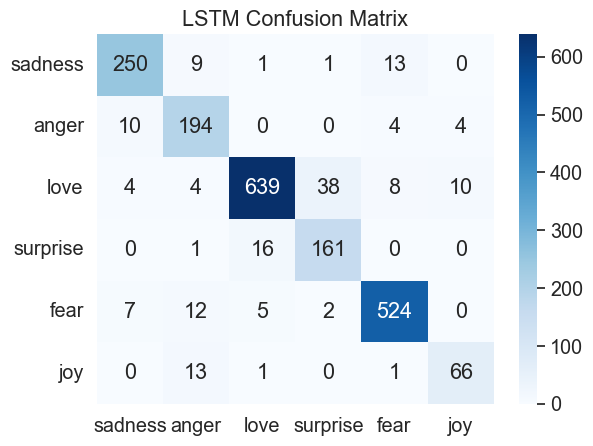

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the predictions for the validation set
lstm_predictions = np.argmax(model.predict(X_val), axis=-1)

# Step 2: Get the true labels
true_labels = np.argmax(y_val, axis=-1)

# Step 3: Create the confusion matrix
conf_matrix_lstm = confusion_matrix(true_labels, lstm_predictions)

# Step 4: Get the class labels (emotions)
class_labels = df_train['Emotion'].unique()

# Step 5: Plot the confusion matrix
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("LSTM Confusion Matrix")
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step
Random Forest Accuracy: 0.8180
LSTM Accuracy: 0.9179
Decision Tree Accuracy: 0.8340


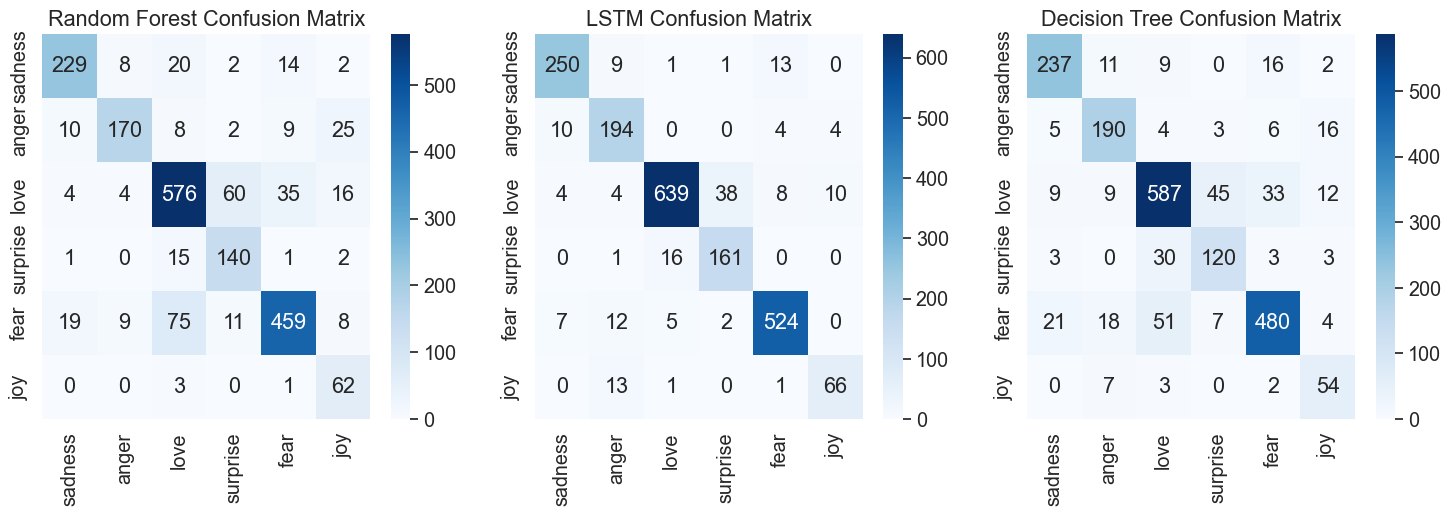

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_rf, y_train_rf)

# Decision Tree evaluation
dt_predictions = dt_model.predict(X_test_rf)
dt_accuracy = accuracy_score(y_test_rf, dt_predictions)

# Random Forest evaluation (as previously provided)
rf_predictions = rf_model.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test_rf, rf_predictions)

# LSTM evaluation (already provided in your LSTM code)
lstm_predictions = np.argmax(model.predict(X_val), axis=-1)
true_labels = np.argmax(y_val, axis=-1)
lstm_accuracy = accuracy_score(true_labels, lstm_predictions)

# Printing comparison of accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Plotting confusion matrices side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_rf, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

# LSTM Confusion Matrix
conf_matrix_lstm = confusion_matrix(true_labels, lstm_predictions)
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax[1])
ax[1].set_title("LSTM Confusion Matrix")

# Decision Tree Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test_rf, dt_predictions)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax[2])
ax[2].set_title("Decision Tree Confusion Matrix")

plt.show()


In [94]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("Emotion Recognition From English text.keras")

# Summary of the model architecture only for LSTM
model.summary()

# Optionally, you can inspect the weights
for layer in model.layers:
    print(f"Layer {layer.name} weights:")
    print(layer.get_weights())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 281, 200)            │       2,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 281, 512)            │         935,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 281, 256)            │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,853,908 (33.77 MB)

 Trainable params: 1,988,102 (7.58 MB)

 Non-trainable params: 2,889,600 (11.02 MB)

 Optimizer params: 3,976,206 (15.17 MB)

Layer embedding weights:
[array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.26805 ,  0.36032 , -0.332   , ...,  0.17769 ,  0.22362 ,
         0.014241],
       ...,
       [-0.15036 , -0.31716 ,  0.20643 , ..., -0.1971  ,  0.8173  ,
        -0.20433 ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.67415 , -0.56267 , -0.5558  , ..., -0.39893 , -0.23931 ,
        -0.13783 ]], dtype=float32)]
Layer bidirectional weights:
[array([[-0.0033431 , -0.05203505,  0.01499467, ...,  0.20223708,
         0.07181915,  0.03998874],
       [-0.08018845, -0.14403582,  0.10817967, ..., -0.13783254,
        -0.03160763,  0.02098793],
       [ 0.12588051,  0.11564591,  0.32050985, ..., -0.1269448 ,
         0.04286369,  0.04694968],
       ...,
       [-0.08856433, -0.03284648, -0.12290929, ..., -0.01677264,
        -0